<a href="https://colab.research.google.com/github/shivamkejriwal9/GRIP-TSF/blob/main/Task5_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the data

In [2]:
dataset=pd.read_csv('SampleSuperstore.csv')

In [3]:
dataset

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [4]:
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
dataset.shape

(9994, 13)

In [6]:
dataset.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [7]:
dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
pd.isnull(dataset).values.any()

False

# Data Visualisation

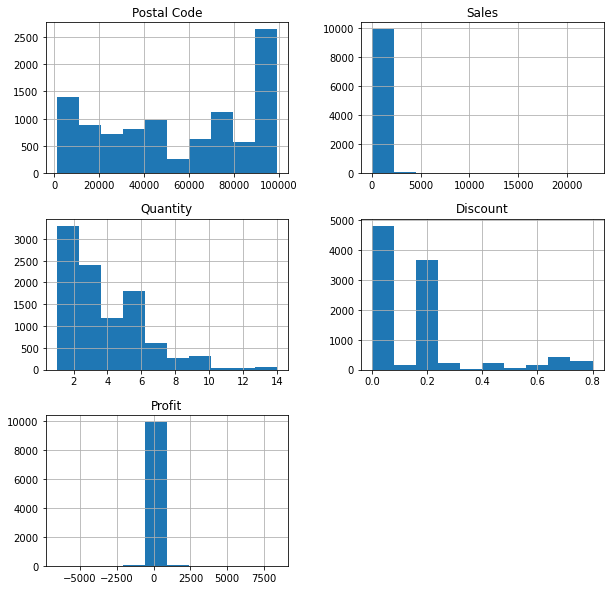

In [9]:
dataset.hist(figsize=[10,10])
plt.show()

## Region-wise analysis

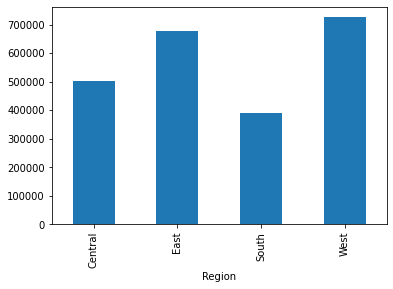

In [10]:
dataset.groupby(dataset['Region'])['Sales'].sum().plot.bar()

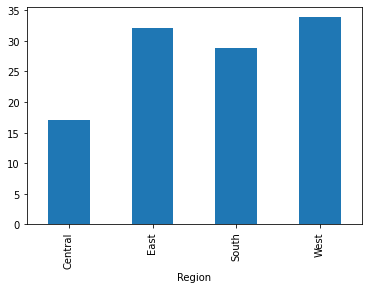

In [11]:
dataset.groupby(dataset['Region'])['Profit'].mean().plot.bar()

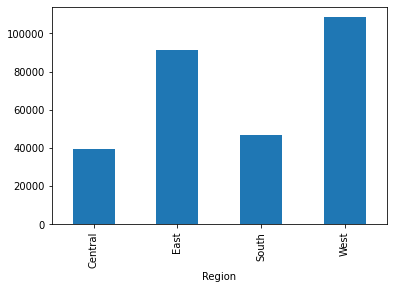

In [12]:
dataset.groupby(dataset['Region'])['Profit'].sum().plot.bar()

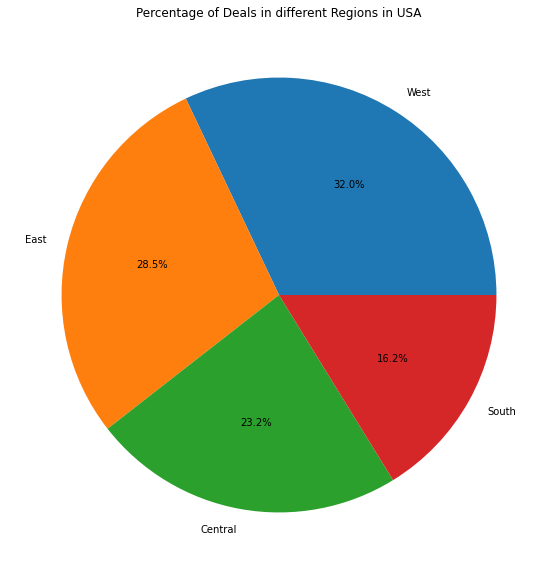

In [13]:
fig = plt.figure(figsize =(10, 10)) 
plt.pie(dataset['Region'].value_counts(), labels = dataset['Region'].value_counts().index,autopct='%1.1f%%')
plt.title('Percentage of Deals in different Regions in USA')
plt.show()

We have found that the Sales and no. of Deals are minimum in the South Region while the mean Profit is minimum in the Central Region hence the company should do work on increasing Sales and making more deals in the Southern Region and increasing the Profit in the Central Region

##Shipping Method Analysis

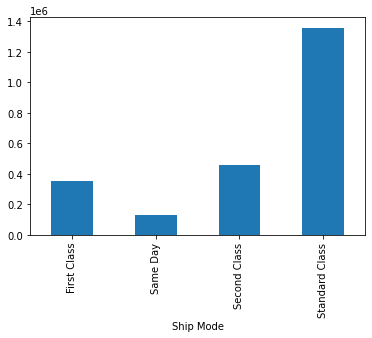

In [14]:
dataset.groupby(dataset['Ship Mode'])['Sales'].sum().plot.bar()

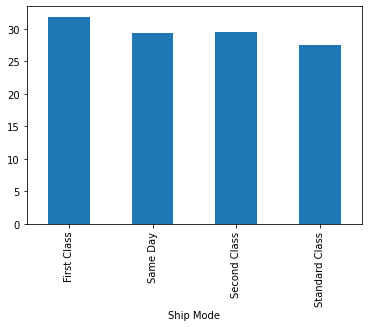

In [15]:
dataset.groupby(dataset['Ship Mode'])['Profit'].mean().plot.bar()

The company should try to have more First Class, Same Day & Second Class deals as the no. of such deals currently is very low but the profit is higher than Standard Class Deals

##Sub-Category Analysis

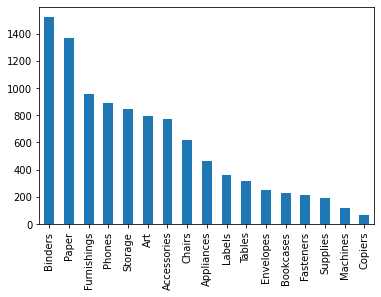

In [16]:
dataset['Sub-Category'].value_counts().plot(kind='bar')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


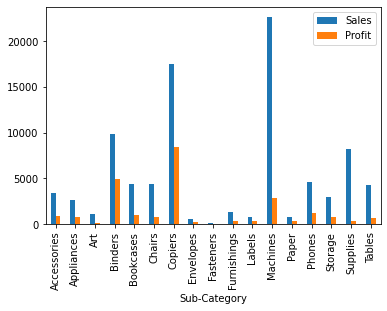

In [17]:
dataset.groupby(dataset['Sub-Category'])['Sales','Profit'].max().plot.bar()

We have found that the minimum deals are made in copiers and machines even though these categories generate high sales and profit. Hence the company should work on publicising these products more and cracking more deals of Machines and Copiers and focus less on Fastners, Envelopes, etc.

##State-wise Analysis

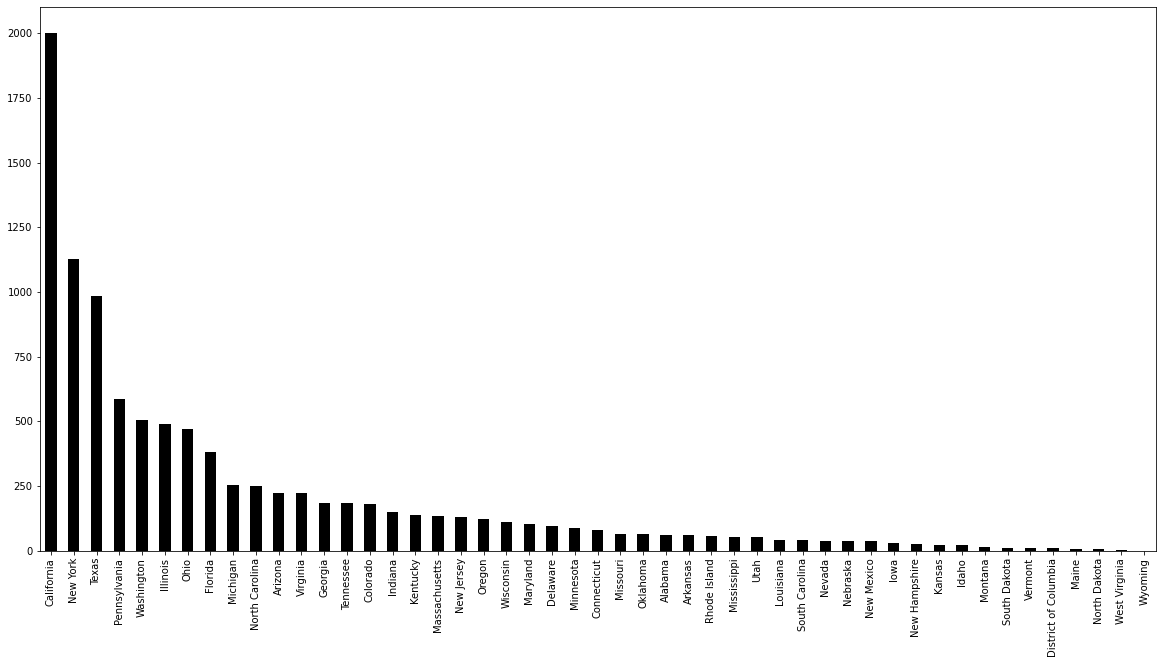

In [18]:
dataset['State'].value_counts().plot(kind='bar', figsize=(20,10),color='black')

There are multiple States like Wisconsin,Minnesota,Oklahama where the deals made are close to none hence the company should focus on making more deals in these States.

##Bivariate Analysis

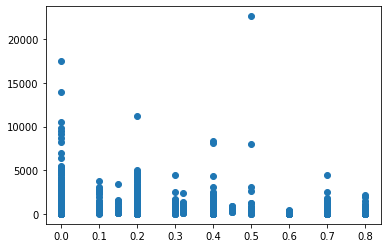

In [19]:
plt.scatter(dataset['Discount'],dataset['Sales'])

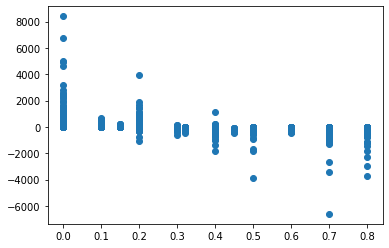

In [20]:
plt.scatter(dataset['Discount'],dataset['Profit'])

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

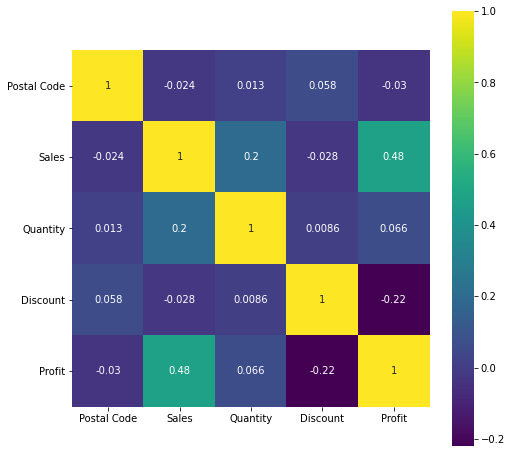

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(dataset.corr(),annot=True,square=True,cmap='viridis')
plt.yticks(rotation=0)